In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [4]:
import ast
import re

# Function to convert string representation of arrays to actual lists
def parse_array_string(array_str):
    # Remove the square brackets and extra spaces
    array_str = array_str.strip('[] ')
    # Split the string by spaces to extract the numbers
    array_elements = re.split(r'\s+', array_str)
    # Convert the string elements to floats
    return [float(element) for element in array_elements]

In [5]:
def epsilon_NNN(X, Y, k_x, k_y, N):
    E_k = [0 for i in range (N)]    #E_k is a 1D matrix of size N 
    for i in range (N):
        e1 = 0
        e2 = 0
        e1 = -8*X*J*(np.cos(k_x[i]*a)+np.cos((k_x[i]*a/2)+(k_y[i]*np.sqrt(3)*a/2))+np.cos((k_x[i]*a/2)-(k_y[i]*np.sqrt(3)*a/2)))
        e2 = -8*Y*J_1*(np.cos(k_y[i]*a*np.sqrt(3))+np.cos((3*k_x[i]*a/2)-(k_y[i]*np.sqrt(3)*a/2))+np.cos((-3*k_x[i]*a/2)-(k_y[i]*np.sqrt(3)*a/2)))
        E_k[i]= e1+e2
    return np.array(E_k)

In [6]:
def epsilon_3D(X, Y, k_x, k_y):
    e1 = 0
    e2 = 0
    e1 = -8*X*J*(np.cos(k_x*a)+np.cos((k_x*a/2)+(k_y*np.sqrt(3)*a/2))+np.cos((k_x*a/2)-(k_y*np.sqrt(3)*a/2)))
    e2 = -8*Y*J_1*(np.cos(k_y*a*np.sqrt(3))+np.cos((3*k_x*a/2)-(k_y*np.sqrt(3)*a/2))+np.cos((-3*k_x*a/2)-(k_y*np.sqrt(3)*a/2)))
    E_k= e1+e2
    return(E_k)

In [7]:
data = pd.read_csv('final_data32_T=0.2_more.csv')

In [8]:
C = data.solution
C = [parse_array_string(array_str) for array_str in C]

In [9]:
def plotter(index, data):
    E = []
    for i in index:
        a = 1
        J = 1
        J_1 = data.ratio[i]
        X = C[i][0]
        Y = C[i][1]

        GM_x =np.linspace(0, np.pi, 20)
        GM_y =GM_x/np.sqrt(3)
    
        MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
        MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

        KM_x =np.linspace(0, 4*np.pi/3, 20)
        KM_y =[0]*len(KM_x)
        
        E_GM = epsilon_NNN(X, Y, GM_x, GM_y, len(GM_x))
        E_MK = epsilon_NNN(X, Y, MK_x, MK_y, len(MK_x))
        E_KM = epsilon_NNN(X, Y, KM_x[::-1], KM_y, len(KM_x))
    
        A = np.append(E_GM, E_MK)
        E1 = np.append(A, E_KM)  
        E.append([round(J_1,4), E1])
     
    return(E)
        

In [23]:
def disp(E):
    plt.figure(figsize =(12,8) )
    for i in E:
        J_1 = i[0]
        x = np.linspace(0, len(i[1]), len(i[1]))
        plt.plot(x,i[1], label=f'$J\'/J$={J_1}')
        #plt.legend(loc='upper left')
    ax = plt.gca()
    ax.xaxis.set_ticks([0, 19, 39, 59])
    ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
    plt.ylabel(r'$ E $', fontsize = 15)
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right');
        
        

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_surface(x, y, z, title, xlabel='k_x', ylabel='k_y', zlabel='E'):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, cmap='viridis')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    
    #ax.view_init(elev=50, azim=50)

    plt.show()

def plot_2d_heatmap(x, y, z, xlabel='k_x', ylabel='k_y', title='E', figsize=(9, 7), cmap='viridis'):
    
    plt.figure(figsize=figsize)
    
    # Using pcolormesh
    heatmap = plt.pcolormesh(x, y, z, shading='auto', cmap=cmap)
    
    plt.colorbar(heatmap)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()


In [12]:
def fermi_surface(kx, ky, X, Y, mu):
    # Fermi surface equation: E(kx, ky) = mu
    return epsilon_3D(X, Y, kx, ky) - mu

def plot_fermi_surface(X, Y, mu):
    # Generate kx and ky values for plotting
    kx = np.linspace(-4*np.pi/3, 4*np.pi/3, 400)
    ky = np.linspace(-2*np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3), 400)
    kx, ky = np.meshgrid(kx, ky)

    # Compute Fermi surface
    fermi_surf = fermi_surface(kx, ky, X, Y, mu)

    # Plot Fermi surface
    plt.figure(figsize=(8, 6))
    plt.contour(kx, ky, fermi_surf, levels=[0], colors='r')
    plt.xlabel(r'$k_x$')
    plt.ylabel(r'$k_y$')
    plt.title(f'Fermi Surface ($\mu$ = {mu})')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


In [141]:
plotter([0,1,3,5,7,12,15,16,18,20],data)

[[0.0,
  array([-4.45772926, -4.40179425, -4.23676402, -3.97075187, -3.61659693,
         -3.19090896, -2.71286217, -2.20285269, -1.68114506, -1.16663105,
         -0.67580923, -0.22206795,  0.18467991,  0.53800024,  0.8346082 ,
          1.07376938,  1.25652263,  1.38483223,  1.46078127,  1.48590975,
          1.48590975,  1.481799  ,  1.46960082,  1.44971272,  1.42278158,
          1.38968076,  1.35147894,  1.30940186,  1.26478783,  1.21903876,
          1.17356789,  1.12974604,  1.08884805,  1.05200102,  1.02013615,
          0.99394566,  0.97384625,  0.95995041,  0.95204661,  0.94958918,
          0.94958918,  0.95717118,  0.97191378,  0.97876871,  0.95983839,
          0.89625007,  0.77029853,  0.56763159,  0.27923992, -0.09697435,
         -0.55523789, -1.08168403, -1.65492306, -2.24737856, -2.82728349,
         -3.36115947, -3.81654982, -4.16474718, -4.38325292, -4.45772926])],
 [0.1078,
  array([-4.46101879, -4.40502328, -4.23981568, -3.97352129, -3.61899805,
         -3.192879

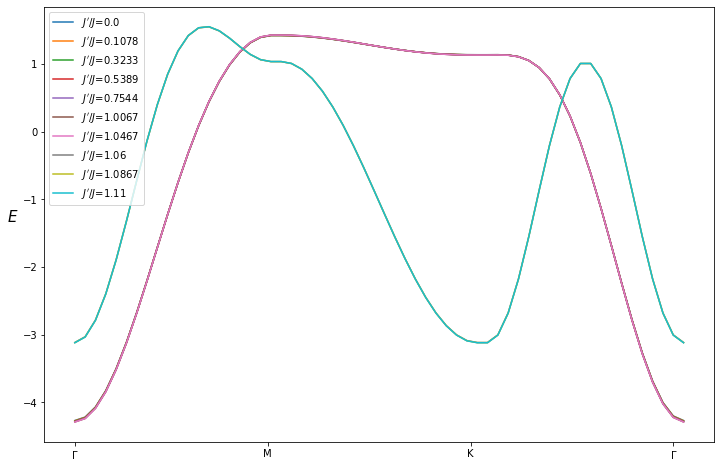

In [57]:
disp(plotter([0,1,3,5,7,12,15,16,18,20],data))

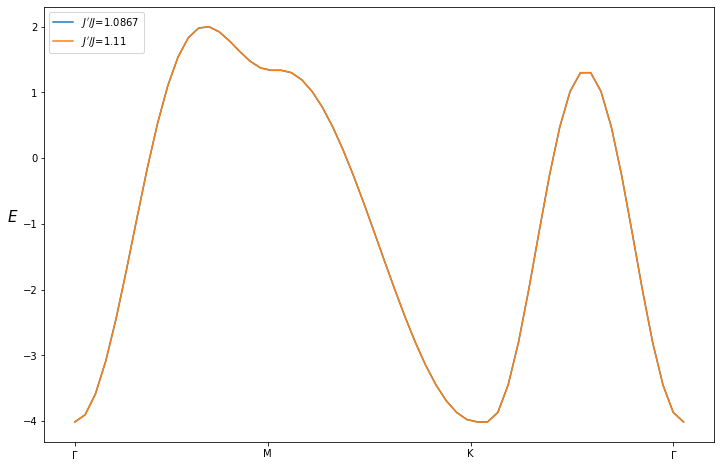

In [143]:
disp(plotter([18,20],data))

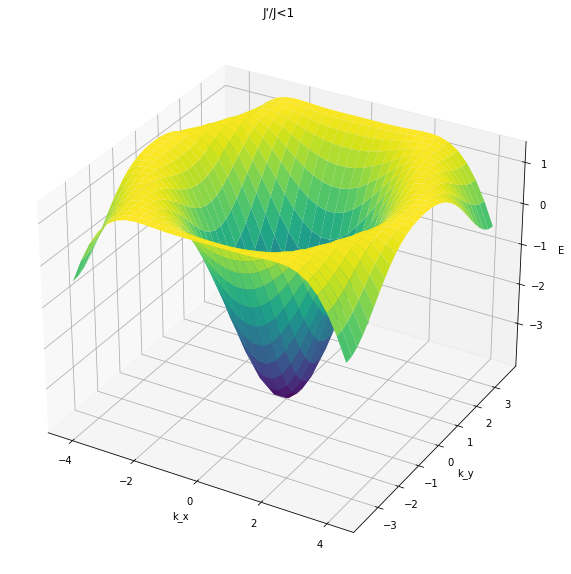

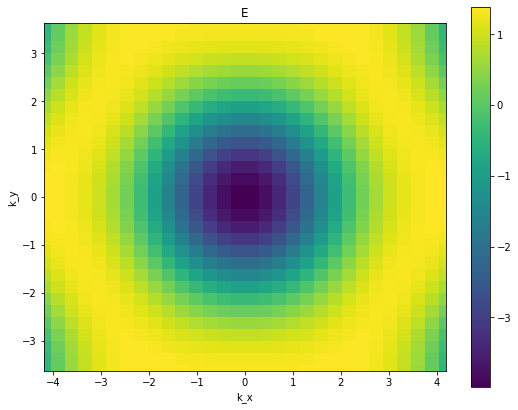

In [35]:
x = np.linspace(-4*np.pi/3, 4*np.pi/3, 30)
y = np.linspace(-2*np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3), 30)
x, y = np.meshgrid(x, y)

X = C[5][0]
Y = C[5][1]
J_1 = data.ratio[5]
a = 1
J = 1

z = epsilon_3D(X, Y, x, y )

plot_3d_surface(x, y, z, 'J\'/J<1')
plot_2d_heatmap(x,y,z)

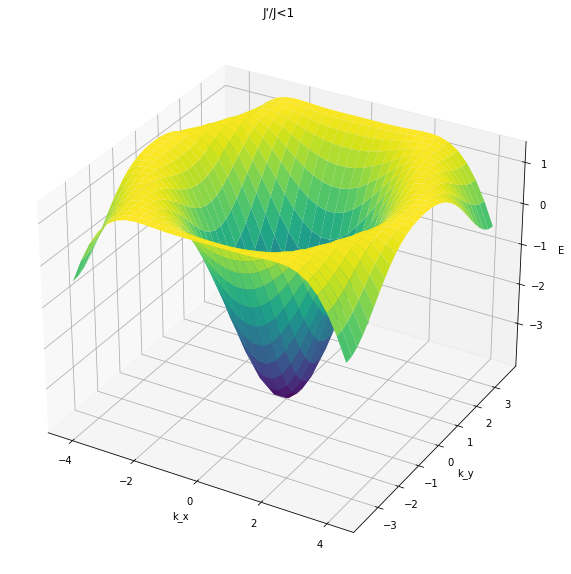

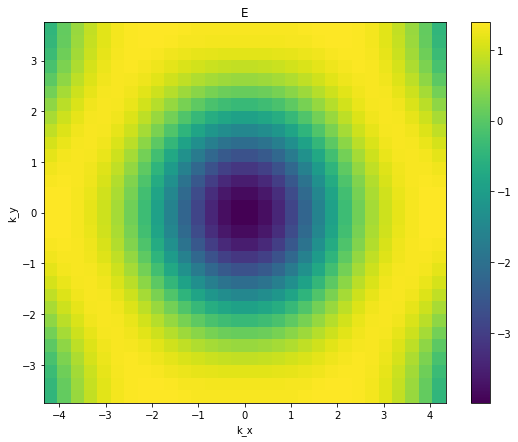

In [119]:
x = np.linspace(-4*np.pi/3, 4*np.pi/3, 30)
y = np.linspace(-2*np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3), 30)
x, y = np.meshgrid(x, y)

X = C[5][0]
Y = C[5][1]
J_1 = data.ratio[5]
a = 1
J = 1

z = epsilon_3D(X, Y, x, y )

plot_3d_surface(x, y, z, 'J\'/J<1')
plot_2d_heatmap(x,y,z)

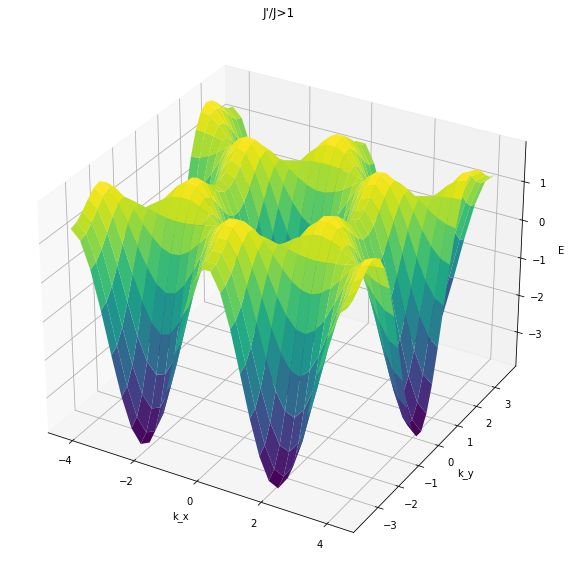

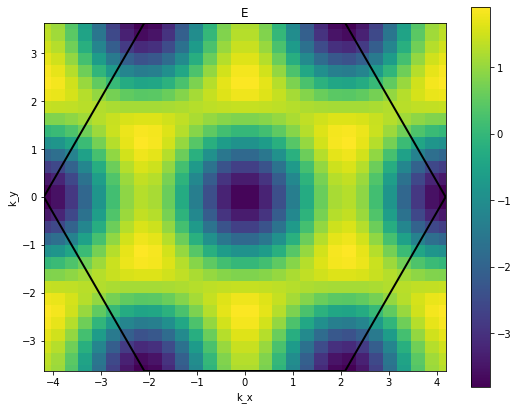

In [55]:
x = np.linspace(-4*np.pi/3, 4*np.pi/3, 30)
y = np.linspace(-2*np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3), 30)
x, y = np.meshgrid(x, y)

X = C[16][0]
Y = C[16][1]
J_1 = data.ratio[16]
a = 1
J = 1

z = epsilon_3D(X, Y, x, y )

plot_3d_surface(x, y, z, 'J\'/J>1')
plot_2d_heatmap(x,y,z)

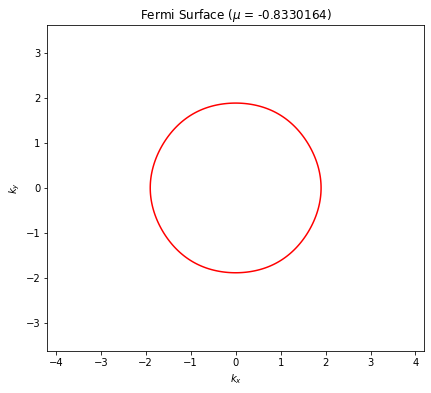

In [138]:
mu = C[7][2]  # Adjust the chemical potential as needed
X = C[7][0]
Y = C[7][1]
a = 1
J = 1
J_1 = data.ratio[7]
plot_fermi_surface(X, Y, mu)

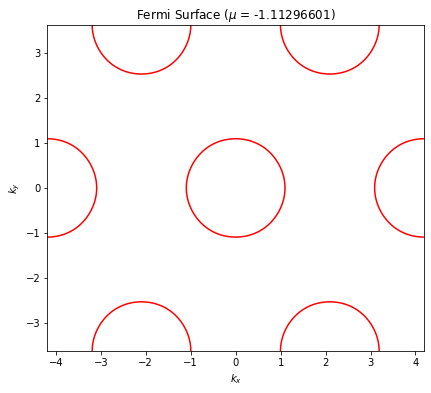

In [139]:
mu = C[18][2]  # Adjust the chemical potential as needed
X = C[18][0]
Y = C[18][1]
a = 1
J = 1
J_1 = data.ratio[18]
plot_fermi_surface(X, Y, mu)

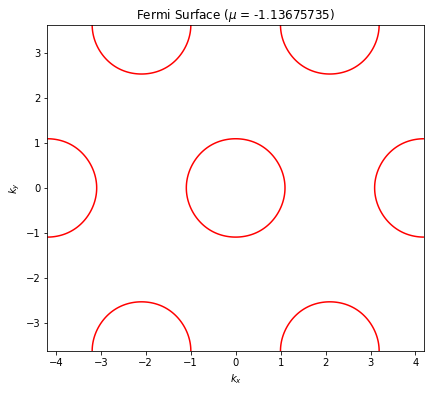

In [140]:
mu = C[20][2]  # Adjust the chemical potential as needed
X = C[20][0]
Y = C[20][1]
a = 1
J = 1
J_1 = data.ratio[20]
plot_fermi_surface(X, Y, mu)

In [7]:
data

,ratio,avg_eng,solution
0,0.000000,19170.706893,[ 0.15020329 0.0320139 -1.02461998]
1,0.107778,22341.218928,[ 0.15026978 0.03207748 -0.99771808]
2,0.215556,25511.947815,[ 0.15033198 0.03213735 -0.97063577]
3,0.323333,28682.831924,[ 0.15039056 0.0321937 -0.94338743]
4,0.431111,31853.912092,[ 0.15044542 0.03224717 -0.91598987]
5,0.538889,35025.166106,[ 0.15049688 0.03229799 -0.88845523]
6,0.646667,38196.595513,[ 0.15054505 0.03234671 -0.8607939 ]
7,0.754444,41368.258475,[ 0.15058955 0.03239402 -0.8330164 ]
8,0.862222,44540.431300,[ 0.15062766 0.03244481 -0.80511281]
9,0.970000,47712.648557,[ 0.15066368 0.03249273 -0.77710671]


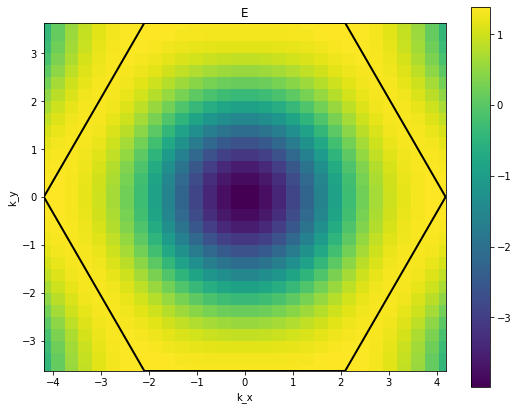

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_heatmap(x, y, z, xlabel='k_x', ylabel='k_y', title='E', figsize=(9, 7), cmap='viridis'):
    plt.figure(figsize=figsize)
    
    # Plotting the heatmap
    heatmap = plt.pcolormesh(x, y, z, shading='auto', cmap=cmap)
    plt.colorbar(heatmap)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
     # Define the reciprocal lattice vectors for the hexagonal Brillouin zone
    b1 = np.array([(4 * np.pi)/3, 0])
    b2 = np.array([(-2 * np.pi) /3,(2 * np.pi) /np.sqrt(3)])
    
    # Compute the vertices of the hexagon
    vertices = np.array([
        b1,
        b1 + b2,
        b2,
        -b1,
        -b1 - b2,
        -b2,
        b1  # Close the loop
    ])
    
    # Plot the hexagon
    for i in range(len(vertices) - 1):
        plt.plot([vertices[i][0], vertices[i + 1][0]], [vertices[i][1], vertices[i + 1][1]], 'k-', lw=2)
    
    plt.xlim(x.min(), x.max())
    plt.ylim(y.min(), y.max())
    
    # Keep aspect ratio equal
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.show()

x = np.linspace(-4*np.pi/3, 4*np.pi/3, 30)
y = np.linspace(-2*np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3), 30)
x, y = np.meshgrid(x, y)

X = C[5][0]
Y = C[5][1]
J_1 = data.ratio[5]
a = 1
J = 1

z = epsilon_3D(X, Y, x, y )

# Call the plotting function

plot_2d_heatmap(x, y, z)


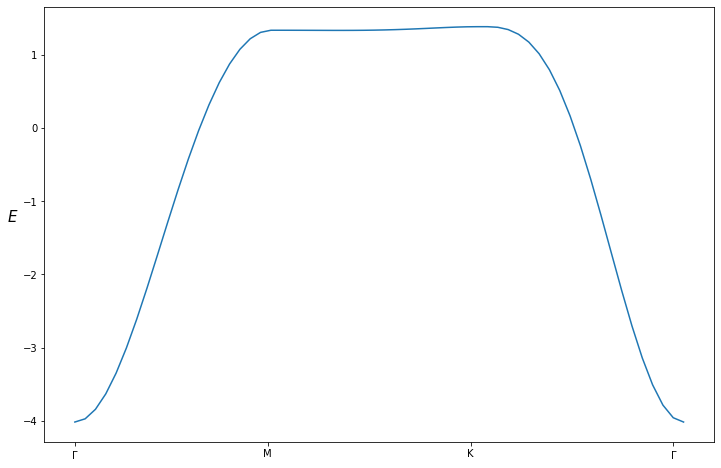

In [24]:
disp(plotter([0],data))

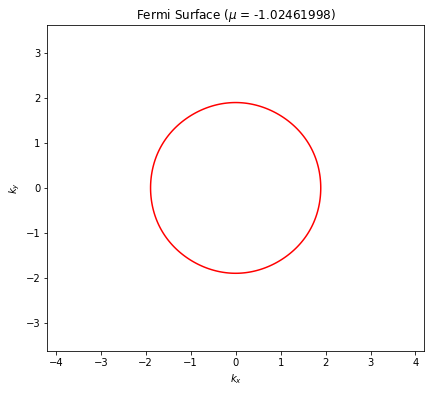

In [25]:
mu = C[0][2]  # Adjust the chemical potential as needed
X = C[0][0]
Y = C[0][1]
a = 1
J = 1
J_1 = data.ratio[0]
plot_fermi_surface(X, Y, mu)

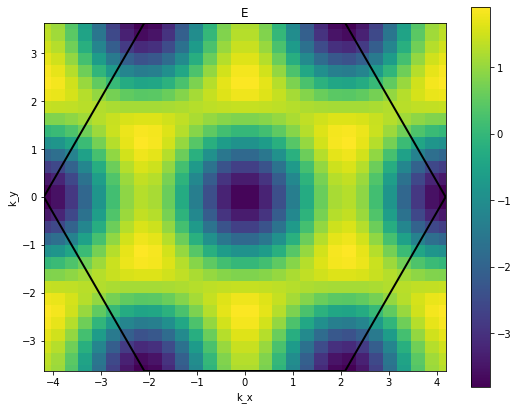

In [54]:
x = np.linspace(-4*np.pi/3, 4*np.pi/3, 30)
y = np.linspace(-2*np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3), 30)
x, y = np.meshgrid(x, y)

X = C[16][0]
Y = C[16][1]
J_1 = data.ratio[16]
a = 1
J = 1

z = epsilon_3D(X, Y, x, y )

# Call the plotting function

plot_2d_heatmap(x, y, z)